Imports

In [105]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Dataset

In [106]:
X_np, y_np = datasets.make_regression(n_samples =1000, n_features = 1, noise = 20)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

In [107]:
y = y.reshape(y.shape[0],-1)
m,n_features = X.shape

Model

In [108]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

Loss and optimiser

In [109]:
loss_criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = .01)

Training loop

In [110]:
n_iterations = 1000

for epoch in range(n_iterations):
    y_hat = model(X)
    loss= loss_criterion(y_hat, y)
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch+1} loss:{loss}")

Epoch: 1 loss:927.263671875
Epoch: 101 loss:410.31201171875
Epoch: 201 loss:400.9521179199219
Epoch: 301 loss:400.7825012207031
Epoch: 401 loss:400.7794189453125
Epoch: 501 loss:400.7793273925781
Epoch: 601 loss:400.77935791015625
Epoch: 701 loss:400.77935791015625
Epoch: 801 loss:400.77935791015625
Epoch: 901 loss:400.77935791015625


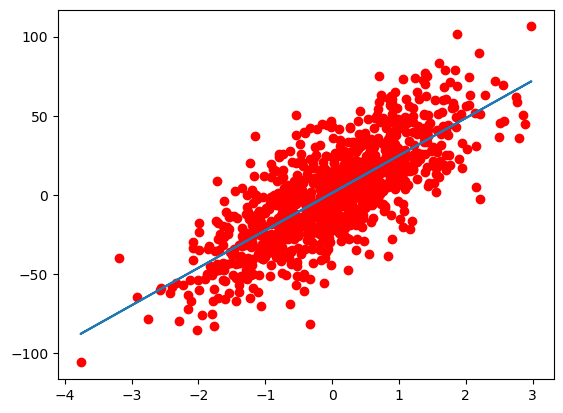

In [111]:
plt.plot(X,y,'ro')
plt.plot(X,model(X).detach().numpy())
plt.show()

In [112]:
X_train = torch.tensor([0.1], dtype = torch.float32)
print(model(X_train).item())

3.7202043533325195
